
##Fraud analysis project
Objective of the Project: The Objective is to find the person who is claiming the insurance is geninue or not.

In [ ]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier



In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link="https://drive.google.com/file/d/1DSySDab81wlZCwCZFVjq257W_vJOOh66/view?usp=sharing"

In [ ]:
downloaded = drive.CreateFile({'id':'1riovlJlia8hc0rYqaFSfiU5TtfNvhKiX'}) 
downloaded.GetContentFile('InsuranceDataset.csv')  
data = pd.read_csv('InsuranceDataset.csv')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
# Read the dataset
data= pd.read_csv("InsuranceDataset.csv")
data.head(5) # displays top 5 rows details

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [ ]:
data.tail(5)

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
1048570,New York City,Bronx,1169.0,70 or Older,F,Other Race,Spanish/Hispanic,6,Emergency,Skilled Nursing Home,106,29,Cardiac arrhythmia & conduction disorders,2,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1048571,New York City,Bronx,1169.0,0 to 17,F,Other Race,Not Span/Hispanic,2,Emergency,Home or Self Care,8,231,Other infectious & parasitic diseases,2,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1048572,New York City,Bronx,1169.0,50 to 69,M,Other Race,Spanish/Hispanic,13,Emergency,Medicare Cert Long Term Care Hospital,151,88,Hepatic coma & other major acute liver disorders,4,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1048573,New York City,Bronx,1169.0,30 to 49,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,143,86,"Inguinal, femoral & umbilical hernia procedures",1,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3
1048574,New York City,Bronx,1169.0,50 to 69,M,Other Race,Spanish/Hispanic,2,Emergency,Home or Self Care,106,0,Cardiac arrhythmia & conduction disorders,1,1.0,Medical,0,N,Y,24832.23,4974.66,0.200331,1,2


In [ ]:
data.shape #Size of the data 

(1048575, 24)

In [ ]:
data.describe()

,Hospital Id,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
count,1.046119e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048533e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.529400e+02,1.987936e+02,9.723249e+01,2.051806e+00,1.748955e+00,2.935512e+02,2.708697e+04,1.046399e+04,4.565822e-01,7.499769e-01,1.935755e+00
std,6.711577e+02,1.652839e+02,8.732697e+01,9.145785e-01,9.864236e-01,9.494631e+02,5.487428e+04,2.230366e+04,8.029246e-01,4.330263e-01,7.717916e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.100000e-01,1.000000e-01,3.312909e-02,0.000000e+00,1.000000e+00
25%,2.130000e+02,1.080000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,7.402500e+03,3.234570e+03,3.135802e-01,0.000000e+00,1.000000e+00
50%,6.300000e+02,1.590000e+02,9.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,1.458988e+04,5.928480e+03,4.091384e-01,1.000000e+00,2.000000e+00
75%,9.770000e+02,2.180000e+02,1.740000e+02,3.000000e+00,3.000000e+00,0.000000e+00,2.914547e+04,1.134317e+04,5.192548e-01,1.000000e+00,3.000000e+00
max,9.250000e+03,6.700000e+02,2.310000e+02,4.000000e+00,4.000000e+00,9.000000e+03,6.196974e+06,2.562478e+06,1.575596e+02,1.000000e+00,5.000000e+00


In [ ]:
data.dtypes # Data Types of all the variables data.dtypes

Area_Service                              object
Hospital County                           object
Hospital Id                              float64
Age                                       object
Gender                                    object
Cultural_group                            object
ethnicity                                 object
Days_spend_hsptl                          object
Admission_type                            object
Home or self care,                        object
ccs_diagnosis_code                         int64
ccs_procedure_code                         int64
apr_drg_description                       object
Code_illness                               int64
Mortality risk                           float64
Surg_Description                          object
Weight_baby                                int64
Abortion                                  object
Emergency dept_yes/No                     object
Tot_charg                                float64
Tot_cost            

In [ ]:
data.info() # information about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [ ]:
#renaming the columns in the dataset
data1=data.rename(columns={'Hospital County':'Hospital_County','Hospital Id':'Hospital_Id','Home or self care,':'Home_self_care','Emergency dept_yes/No':'Emergencydept','Mortality risk': 'Mortality_risk'})

In [ ]:
data1.nunique()                              # Number of Unique values present in each variable

Area_Service                                  7
Hospital_County                              51
Hospital_Id                                 143
Age                                           5
Gender                                        3
Cultural_group                                4
ethnicity                                     3
Days_spend_hsptl                            120
Admission_type                                6
Home_self_care                               19
ccs_diagnosis_code                          262
ccs_procedure_code                          230
apr_drg_description                         316
Code_illness                                  5
Mortality_risk                                4
Surg_Description                              3
Weight_baby                                  70
Abortion                                      2
Emergencydept                                 2
Tot_charg                                869659
Tot_cost                                

In [ ]:
data1[data1.duplicated()].shape              #Count of duplicated rows
data1[data1.duplicated()]                    #Print the duplicated rows

,Area_Service,Hospital_County,Hospital_Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_self_care,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality_risk,Surg_Description,Weight_baby,Abortion,Emergencydept,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
1125,Western NY,Allegany,39.0,0 to 17,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,115,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,3700,N,N,1678.75,737.21,0.439141,1,1
3086,Western NY,Cattaraugus,66.0,0 to 17,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,115,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,3600,N,N,1251.50,829.70,0.662961,0,1
3226,Western NY,Cattaraugus,66.0,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,0,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2700,N,N,1150.50,788.65,0.685486,1,1
4209,Western NY,Cattaraugus,66.0,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,0,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2700,N,N,1150.50,788.65,0.685486,1,1
4234,Western NY,Cattaraugus,66.0,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,0,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2800,N,N,1150.50,788.65,0.685486,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015327,New York City,Bronx,1168.0,0 to 17,F,Other Race,Not Span/Hispanic,2,Newborn,Home or Self Care,218,228,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2900,N,N,5955.85,1303.62,0.218881,1,3
1025529,New York City,Bronx,1169.0,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83,227,Seizure,2,1.0,Medical,0,N,N,12500.00,2960.11,0.236809,1,3
1028997,New York City,Bronx,1169.0,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83,227,Seizure,1,1.0,Medical,0,N,N,12557.00,2963.40,0.235996,1,2
1035973,New York City,Bronx,1169.0,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83,227,Seizure,2,1.0,Medical,0,N,N,12500.00,2960.11,0.236809,1,3


In [ ]:
data2=data1.drop_duplicates()  

In [ ]:
data2.head(5)

,Area_Service,Hospital_County,Hospital_Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_self_care,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality_risk,Surg_Description,Weight_baby,Abortion,Emergencydept,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [ ]:
data2

,Area_Service,Hospital_County,Hospital_Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_self_care,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality_risk,Surg_Description,Weight_baby,Abortion,Emergencydept,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,1169.0,70 or Older,F,Other Race,Spanish/Hispanic,6,Emergency,Skilled Nursing Home,106,29,Cardiac arrhythmia & conduction disorders,2,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1048571,New York City,Bronx,1169.0,0 to 17,F,Other Race,Not Span/Hispanic,2,Emergency,Home or Self Care,8,231,Other infectious & parasitic diseases,2,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1048572,New York City,Bronx,1169.0,50 to 69,M,Other Race,Spanish/Hispanic,13,Emergency,Medicare Cert Long Term Care Hospital,151,88,Hepatic coma & other major acute liver disorders,4,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1048573,New York City,Bronx,1169.0,30 to 49,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,143,86,"Inguinal, femoral & umbilical hernia procedures",1,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3


In [ ]:
data2.shape          # size of the dataset

(1043761, 24)

In [ ]:
data2[data2.isnull().any(axis=1)].head(5)                           # listing null values

,Area_Service,Hospital_County,Hospital_Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,Home_self_care,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality_risk,Surg_Description,Weight_baby,Abortion,Emergencydept,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
12,NaN,NaN,NaN,30 to 49,M,Other Race,Not Span/Hispanic,2,Elective,Home or Self Care,126,0,Infections of upper respiratory tract,3,3.0,Medical,0,N,Y,2896.70,3834.01,1.323580,1,1
16,NaN,NaN,NaN,30 to 49,M,White,Spanish/Hispanic,3,Urgent,Home or Self Care,126,0,Infections of upper respiratory tract,1,1.0,Medical,0,N,Y,3472.25,4069.85,1.172107,1,1
33,NaN,NaN,NaN,70 or Older,F,White,Spanish/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,2509.75,2636.72,1.050590,1,1
77,NaN,NaN,NaN,70 or Older,F,Black/African American,Not Span/Hispanic,3,Elective,Skilled Nursing Home,58,202,"Malnutrition, failure to thrive & other nutrit...",3,2.0,Medical,0,N,N,2998.00,3215.64,1.072593,1,2
86,NaN,NaN,NaN,30 to 49,F,White,Spanish/Hispanic,4,Elective,Home or Self Care,159,0,Kidney & urinary tract infections,2,1.0,Medical,0,N,Y,4806.25,5225.46,1.087221,1,1


In [ ]:
data2=data2[['Area_Service', 'Hospital_County', 'Hospital_Id', 'Age', 'Gender','Cultural_group', 'ethnicity','Days_spend_hsptl','Admission_type','ccs_diagnosis_code', 'ccs_procedure_code','Home_self_care','apr_drg_description', 'Code_illness', 'Mortality_risk','Surg_Description','Weight_baby', 'Abortion', 'Emergencydept','Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges','Payment_Typology','Result']]

In [ ]:
data2['Days_spend_hsptl']=pd.to_numeric(data2['Days_spend_hsptl'],errors='coerce')
                                                        # coerce will introduce NA values for non numeric data in the columns
                                                         #data['Wind']=data['Wind'].astype('int64')

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043761 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1041306 non-null  object 
 1   Hospital_County                        1041306 non-null  object 
 2   Hospital_Id                            1041306 non-null  float64
 3   Age                                    1043761 non-null  object 
 4   Gender                                 1043761 non-null  object 
 5   Cultural_group                         1043761 non-null  object 
 6   ethnicity                              1043761 non-null  object 
 7   Days_spend_hsptl                       1042996 non-null  float64
 8   Admission_type                         1043761 non-null  object 
 9   ccs_diagnosis_code                     1043761 non-null  int64  
 10  ccs_procedure_code                     104

In [ ]:
# dropping unwanted coloumn

In [ ]:
data3 = data2.drop(['Area_Service','Hospital_County','Weight_baby','ratio_of_total_costs_to_total_charges','Cultural_group','ethnicity'],axis=1)
data3 

,Hospital_Id,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,ccs_procedure_code,Home_self_care,apr_drg_description,Code_illness,Mortality_risk,Surg_Description,Abortion,Emergencydept,Tot_charg,Tot_cost,Payment_Typology,Result
0,37.0,30 to 49,F,4.0,Elective,122,0,Home or Self Care,Other pneumonia,1,1.0,Medical,N,Y,5511.95,5582.49,1,1
1,37.0,70 or Older,F,4.0,Urgent,197,0,Short-term Hospital,Cellulitis & other skin infections,3,2.0,Medical,N,Y,4783.20,5162.82,1,1
2,37.0,30 to 49,F,3.0,Urgent,122,0,Home or Self Care,Other pneumonia,1,1.0,Medical,N,Y,3829.15,4056.52,1,1
3,37.0,0 to 17,F,1.0,Urgent,122,0,Home or Self Care,Other pneumonia,1,1.0,Medical,N,Y,1108.20,1644.75,1,0
4,37.0,70 or Older,F,3.0,Elective,122,0,Home or Self Care,Other pneumonia,2,3.0,Medical,N,Y,3418.18,3370.87,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1169.0,70 or Older,F,6.0,Emergency,106,29,Skilled Nursing Home,Cardiac arrhythmia & conduction disorders,2,3.0,Medical,N,Y,69650.41,13896.82,3,1
1048571,1169.0,0 to 17,F,2.0,Emergency,8,231,Home or Self Care,Other infectious & parasitic diseases,2,1.0,Medical,N,N,13587.38,3918.35,3,1
1048572,1169.0,50 to 69,M,13.0,Emergency,151,88,Medicare Cert Long Term Care Hospital,Hepatic coma & other major acute liver disorders,4,4.0,Medical,N,Y,104629.78,24746.64,3,0
1048573,1169.0,30 to 49,F,2.0,Emergency,143,86,Home or Self Care,"Inguinal, femoral & umbilical hernia procedures",1,1.0,Surgical,N,Y,27521.41,6766.04,3,1


Missing Values and Imputation

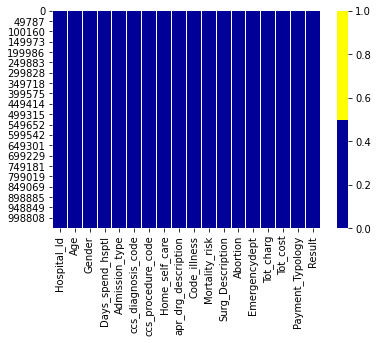

In [ ]:
import seaborn as sns
cols = data3.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data3[cols].isnull(),
            cmap=sns.color_palette(colours))

In [ ]:
data3._get_numeric_data().columns

Index(['Hospital_Id', 'Days_spend_hsptl', 'ccs_diagnosis_code',
       'ccs_procedure_code', 'Code_illness', 'Mortality_risk', 'Tot_charg',
       'Tot_cost', 'Payment_Typology', 'Result'],
      dtype='object')

In [ ]:
data3.select_dtypes(include=['object']).columns 

Index(['Age', 'Gender', 'Admission_type', 'Home_self_care',
       'apr_drg_description', 'Surg_Description', 'Abortion', 'Emergencydept'],
      dtype='object')

In [ ]:
data3[data3.isnull().any(axis=1)].head()

,Hospital_Id,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,ccs_procedure_code,Home_self_care,apr_drg_description,Code_illness,Mortality_risk,Surg_Description,Abortion,Emergencydept,Tot_charg,Tot_cost,Payment_Typology,Result
12,NaN,30 to 49,M,2.0,Elective,126,0,Home or Self Care,Infections of upper respiratory tract,3,3.0,Medical,N,Y,2896.70,3834.01,1,1
16,NaN,30 to 49,M,3.0,Urgent,126,0,Home or Self Care,Infections of upper respiratory tract,1,1.0,Medical,N,Y,3472.25,4069.85,1,1
33,NaN,70 or Older,F,1.0,Urgent,122,0,Home or Self Care,Other pneumonia,2,3.0,Medical,N,Y,2509.75,2636.72,1,1
77,NaN,70 or Older,F,3.0,Elective,58,202,Skilled Nursing Home,"Malnutrition, failure to thrive & other nutrit...",3,2.0,Medical,N,N,2998.00,3215.64,2,1
86,NaN,30 to 49,F,4.0,Elective,159,0,Home or Self Care,Kidney & urinary tract infections,2,1.0,Medical,N,Y,4806.25,5225.46,1,1


In [ ]:
data3.isnull().sum()

Hospital_Id            2455
Age                       0
Gender                    0
Days_spend_hsptl        765
Admission_type            0
ccs_diagnosis_code        0
ccs_procedure_code        0
Home_self_care            0
apr_drg_description       0
Code_illness              0
Mortality_risk           41
Surg_Description          0
Abortion                  0
Emergencydept             0
Tot_charg                 0
Tot_cost                  0
Payment_Typology          0
Result                    0
dtype: int64

In [ ]:
data4=data3.dropna()
data4

,Hospital_Id,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,ccs_procedure_code,Home_self_care,apr_drg_description,Code_illness,Mortality_risk,Surg_Description,Abortion,Emergencydept,Tot_charg,Tot_cost,Payment_Typology,Result
0,37.0,30 to 49,F,4.0,Elective,122,0,Home or Self Care,Other pneumonia,1,1.0,Medical,N,Y,5511.95,5582.49,1,1
1,37.0,70 or Older,F,4.0,Urgent,197,0,Short-term Hospital,Cellulitis & other skin infections,3,2.0,Medical,N,Y,4783.20,5162.82,1,1
2,37.0,30 to 49,F,3.0,Urgent,122,0,Home or Self Care,Other pneumonia,1,1.0,Medical,N,Y,3829.15,4056.52,1,1
3,37.0,0 to 17,F,1.0,Urgent,122,0,Home or Self Care,Other pneumonia,1,1.0,Medical,N,Y,1108.20,1644.75,1,0
4,37.0,70 or Older,F,3.0,Elective,122,0,Home or Self Care,Other pneumonia,2,3.0,Medical,N,Y,3418.18,3370.87,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1169.0,70 or Older,F,6.0,Emergency,106,29,Skilled Nursing Home,Cardiac arrhythmia & conduction disorders,2,3.0,Medical,N,Y,69650.41,13896.82,3,1
1048571,1169.0,0 to 17,F,2.0,Emergency,8,231,Home or Self Care,Other infectious & parasitic diseases,2,1.0,Medical,N,N,13587.38,3918.35,3,1
1048572,1169.0,50 to 69,M,13.0,Emergency,151,88,Medicare Cert Long Term Care Hospital,Hepatic coma & other major acute liver disorders,4,4.0,Medical,N,Y,104629.78,24746.64,3,0
1048573,1169.0,30 to 49,F,2.0,Emergency,143,86,Home or Self Care,"Inguinal, femoral & umbilical hernia procedures",1,1.0,Surgical,N,Y,27521.41,6766.04,3,1


In [ ]:
data4.isnull().sum()

Hospital_Id            0
Age                    0
Gender                 0
Days_spend_hsptl       0
Admission_type         0
ccs_diagnosis_code     0
ccs_procedure_code     0
Home_self_care         0
apr_drg_description    0
Code_illness           0
Mortality_risk         0
Surg_Description       0
Abortion               0
Emergencydept          0
Tot_charg              0
Tot_cost               0
Payment_Typology       0
Result                 0
dtype: int64

In [ ]:
def countplot(data4):
   plt.figure(figsize=(10,7))
   return (sns.countplot(data4))
   plt.show()

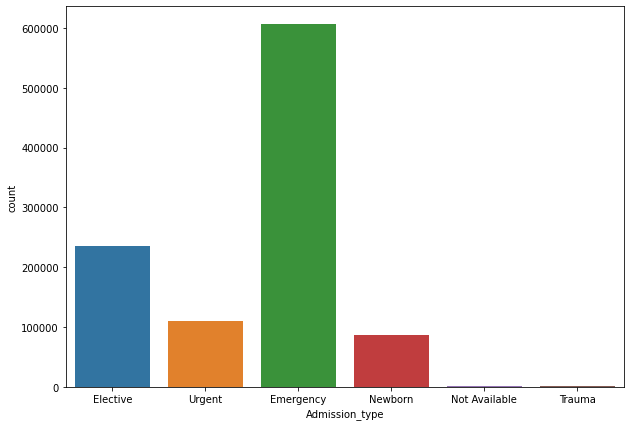

In [ ]:
countplot(data4.Admission_type)

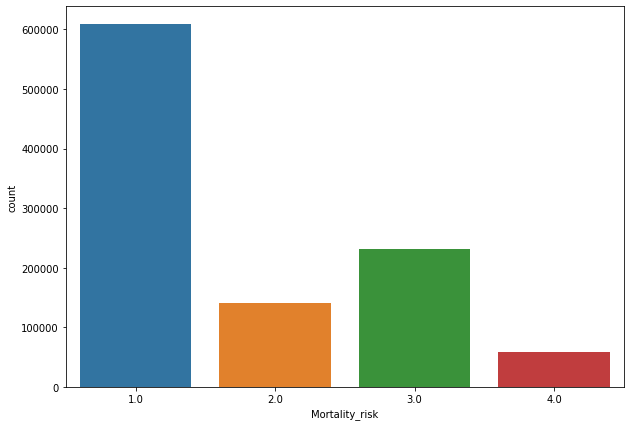

In [ ]:
countplot(data4["Mortality_risk"])

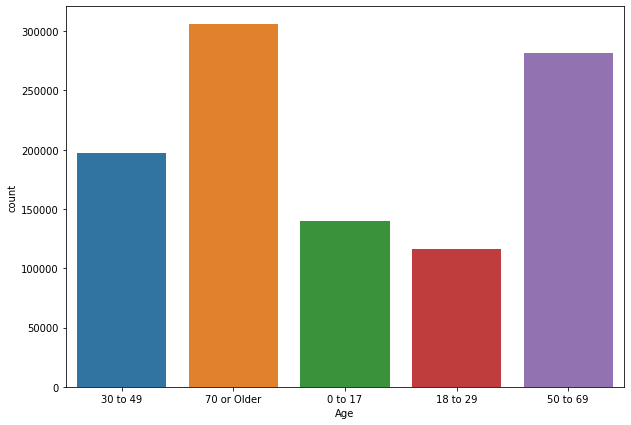

In [ ]:
countplot(data4.Age)

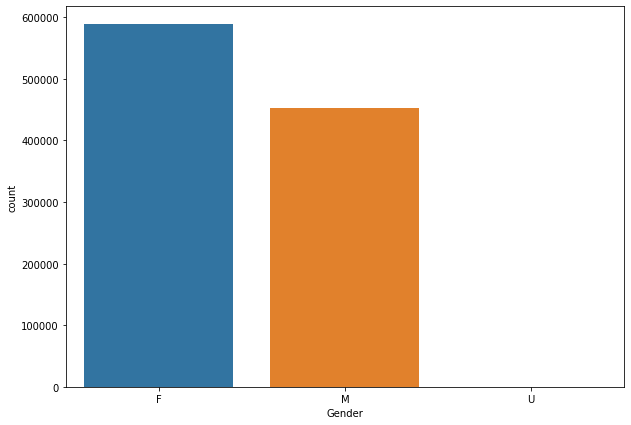

In [ ]:
countplot(data4.Gender)

In [ ]:
def stack_plot(x_var,groupby_var):
    data4_agg = data4.loc[:, [x_var, groupby_var]].groupby(groupby_var)
    vals = [data4[x_var].values.tolist() for i, data4 in data4_agg]

    # Draw
    plt.figure(figsize=(9,7), dpi= 80)
    colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
    n, bins, patches = plt.hist(vals, data4[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)],)

    # Decoration
    plt.legend({group:col for group, col in zip(np.unique(data4[groupby_var]).tolist(), colors[:len(vals)])})
    plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=18)
    plt.xlabel(x_var)
    plt.ylabel("Result")
    plt.show()

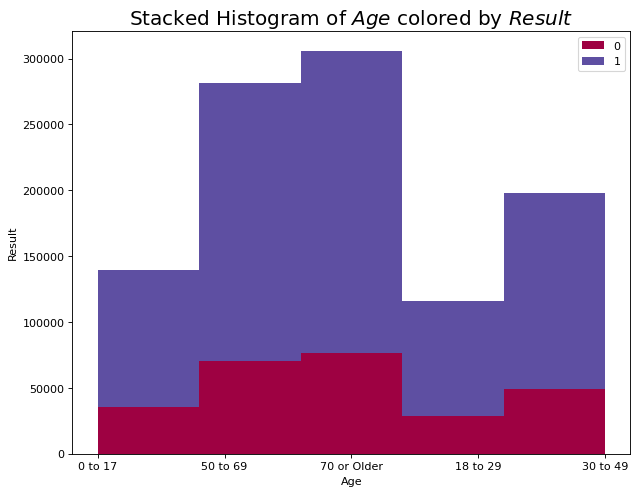

In [ ]:
stack_plot("Age",'Result')

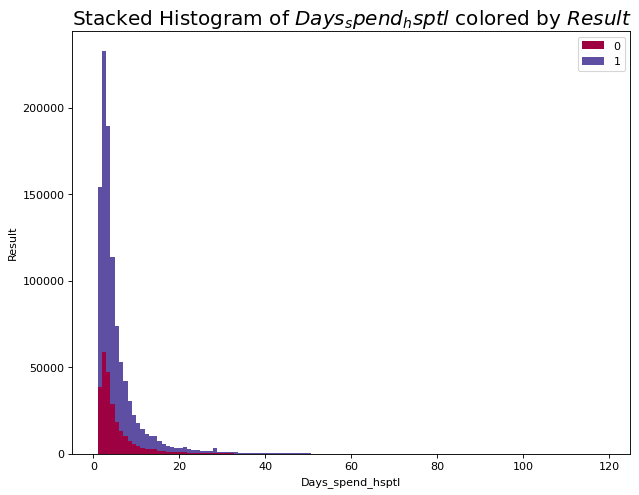

In [ ]:
stack_plot("Days_spend_hsptl",'Result')

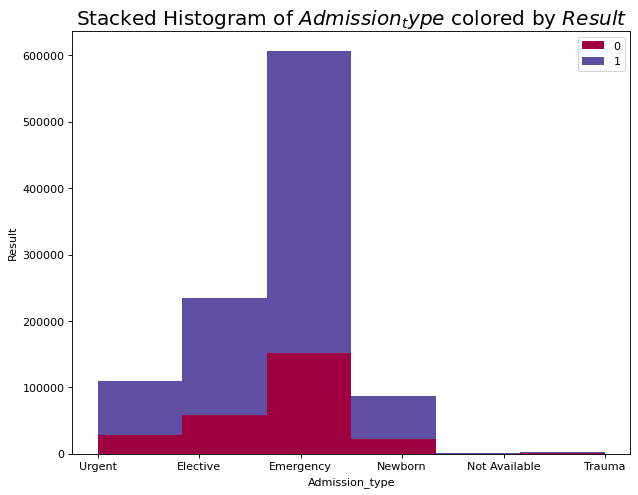

In [ ]:
stack_plot("Admission_type",'Result')

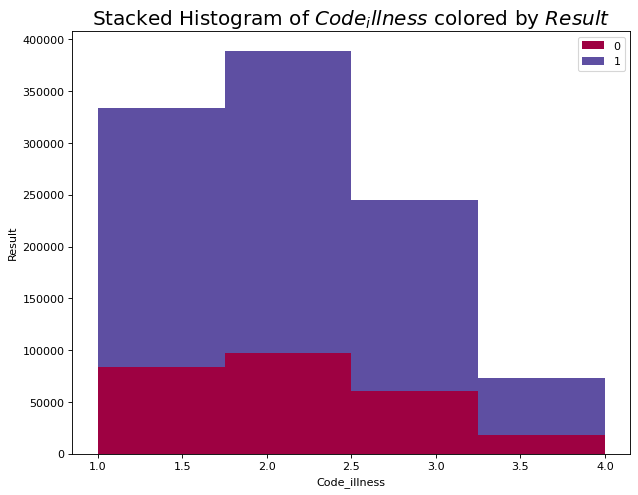

In [ ]:
stack_plot("Code_illness",'Result')

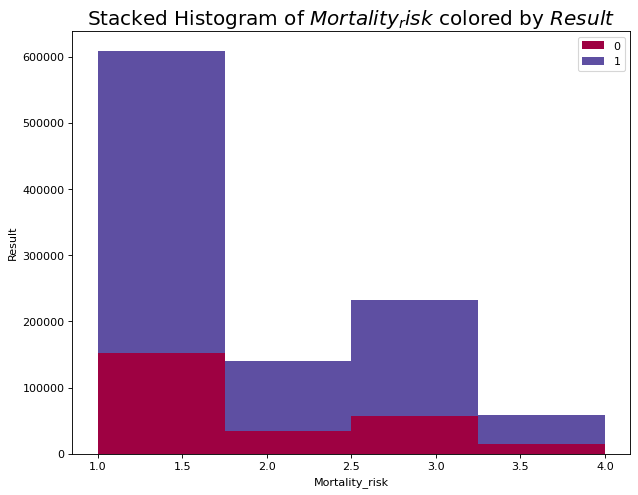

In [ ]:
stack_plot("Mortality_risk",'Result')

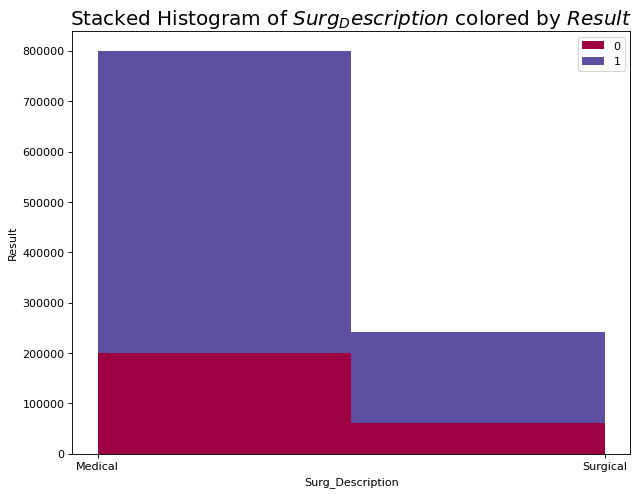

In [ ]:
stack_plot("Surg_Description",'Result')

Label Encoder

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()
data4['Age'] = le.fit_transform(data4.Age.values)
data4['Gender'] = le.fit_transform(data4.Gender.values)
data4['Admission_type'] = le.fit_transform(data4.Admission_type.values)
data4['Home_self_care'] = le.fit_transform(data4.Home_self_care.values)
data4['apr_drg_description'] = le.fit_transform(data4.apr_drg_description.values)
data4['Surg_Description'] = le.fit_transform(data4.Surg_Description.values)
data4['Abortion'] = le.fit_transform(data4.Abortion.values)
data4['Emergencydept'] = le.fit_transform(data4.Emergencydept.values)

In [ ]:
data4

,Hospital_Id,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,ccs_procedure_code,Home_self_care,apr_drg_description,Code_illness,Mortality_risk,Surg_Description,Abortion,Emergencydept,Tot_charg,Tot_cost,Payment_Typology,Result
0,37.0,2,0,4.0,0,122,0,7,237,1,1.0,0,0,1,5511.95,5582.49,1,1
1,37.0,4,0,4.0,5,197,0,17,38,3,2.0,0,0,1,4783.20,5162.82,1,1
2,37.0,2,0,3.0,5,122,0,7,237,1,1.0,0,0,1,3829.15,4056.52,1,1
3,37.0,0,0,1.0,5,122,0,7,237,1,1.0,0,0,1,1108.20,1644.75,1,0
4,37.0,4,0,3.0,0,122,0,7,237,2,3.0,0,0,1,3418.18,3370.87,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1169.0,4,0,6.0,1,106,29,18,28,2,3.0,0,0,1,69650.41,13896.82,3,1
1048571,1169.0,0,0,2.0,1,8,231,7,227,2,1.0,0,0,0,13587.38,3918.35,3,1
1048572,1169.0,3,1,13.0,1,151,88,15,99,4,4.0,0,0,1,104629.78,24746.64,3,0
1048573,1169.0,2,0,2.0,1,143,86,7,109,1,1.0,1,0,1,27521.41,6766.04,3,1


In [ ]:
data4.dtypes

Hospital_Id            float64
Age                      int64
Gender                   int64
Days_spend_hsptl       float64
Admission_type           int64
ccs_diagnosis_code       int64
ccs_procedure_code       int64
Home_self_care           int64
apr_drg_description      int64
Code_illness             int64
Mortality_risk         float64
Surg_Description         int64
Abortion                 int64
Emergencydept            int64
Tot_charg              float64
Tot_cost               float64
Payment_Typology         int64
Result                   int64
dtype: object

In [ ]:
X=data4.drop(['Result'],axis=1)
X

,Hospital_Id,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,ccs_procedure_code,Home_self_care,apr_drg_description,Code_illness,Mortality_risk,Surg_Description,Abortion,Emergencydept,Tot_charg,Tot_cost,Payment_Typology
0,37.0,2,0,4.0,0,122,0,7,237,1,1.0,0,0,1,5511.95,5582.49,1
1,37.0,4,0,4.0,5,197,0,17,38,3,2.0,0,0,1,4783.20,5162.82,1
2,37.0,2,0,3.0,5,122,0,7,237,1,1.0,0,0,1,3829.15,4056.52,1
3,37.0,0,0,1.0,5,122,0,7,237,1,1.0,0,0,1,1108.20,1644.75,1
4,37.0,4,0,3.0,0,122,0,7,237,2,3.0,0,0,1,3418.18,3370.87,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1169.0,4,0,6.0,1,106,29,18,28,2,3.0,0,0,1,69650.41,13896.82,3
1048571,1169.0,0,0,2.0,1,8,231,7,227,2,1.0,0,0,0,13587.38,3918.35,3
1048572,1169.0,3,1,13.0,1,151,88,15,99,4,4.0,0,0,1,104629.78,24746.64,3
1048573,1169.0,2,0,2.0,1,143,86,7,109,1,1.0,1,0,1,27521.41,6766.04,3


In [ ]:
Y = data4.Result
Y

0          1
1          1
2          1
3          0
4          1
          ..
1048570    1
1048571    1
1048572    0
1048573    1
1048574    1
Name: Result, Length: 1040503, dtype: int64

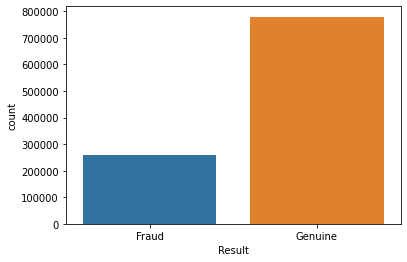

In [ ]:
g = sns.countplot(data4['Result'])
g.set_xticklabels(['Fraud','Genuine'])
plt.show()

##Outlier Detection Using Isolation Forest

In [ ]:
IF = IsolationForest(random_state=42,contamination=0.1)
IF.fit(X,Y)
y_outliers = IF.predict(X)
data4['y_outliers'] = y_outliers
data4[data4['y_outliers']==-1]

,Hospital_Id,Age,Gender,Days_spend_hsptl,Admission_type,ccs_diagnosis_code,ccs_procedure_code,Home_self_care,apr_drg_description,Code_illness,Mortality_risk,Surg_Description,Abortion,Emergencydept,Tot_charg,Tot_cost,Payment_Typology,Result,y_outliers
66,37.0,4,0,4.0,5,58,202,18,152,3,2.0,0,0,0,3221.75,3276.42,2,1,-1
130,37.0,0,1,2.0,5,128,0,7,15,1,1.0,0,0,1,2032.45,2376.72,1,1,-1
150,39.0,4,1,12.0,1,131,216,4,272,4,4.0,0,0,1,53235.50,28726.36,2,1,-1
214,39.0,4,0,2.0,5,59,222,5,135,3,3.0,0,0,0,8756.75,3851.13,3,1,-1
260,39.0,0,1,4.0,5,125,0,7,23,1,1.0,0,0,0,10802.75,6574.25,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048544,1169.0,4,0,30.0,1,13,222,4,61,4,4.0,0,0,1,255595.96,61940.66,3,1,-1
1048546,1169.0,2,0,19.0,1,116,75,8,126,4,4.0,1,0,0,361193.61,77497.73,3,1,-1
1048549,1169.0,3,1,16.0,1,151,216,4,99,4,4.0,0,0,1,134722.94,28085.03,3,0,-1
1048559,1169.0,3,0,15.0,1,237,5,18,287,1,1.0,1,0,0,120200.08,27983.66,3,1,-1


In [ ]:
data4.drop(data4.loc[data4['y_outliers']==-1].index, inplace=True)

In [ ]:
data4 = data4.drop(columns=['y_outliers'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

In [ ]:
Y.value_counts()

1    779799
0    260704
Name: Result, dtype: int64

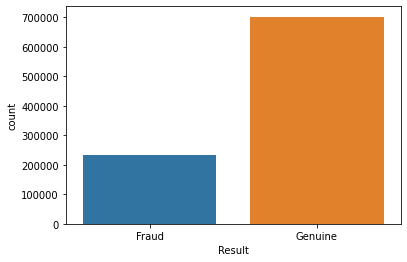

In [ ]:
g = sns.countplot(data4['Result'])
g.set_xticklabels(['Fraud','Genuine'])
plt.show()

Balance the data using SMOTETomek

In [ ]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(ratio="auto",random_state=42)
x_smt, y_smt = smt.fit_sample(X,Y)

In [ ]:
y_smt

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
unique, count = np.unique(y_smt, return_counts=True)
count

array([734722, 734722])

Train Test Split for data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_smt, y_smt, test_size=0.2,stratify=y_smt)

In [ ]:
unique, count = np.unique(y_train,return_counts=True)
count

array([587778, 587777])

Random Forest Classifier

In [ ]:
RFC1 = RandomForestClassifier(n_estimators=13,max_features=6,min_samples_leaf=6,min_samples_split=5,n_jobs=-1)
RFC1.fit(x_train,y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
y_train_predRFC1 = RFC1.predict(x_train)
print(classification_report(y_train,y_train_predRFC1))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84    587778
           1       0.79      0.99      0.88    587777

    accuracy                           0.86   1175555
   macro avg       0.89      0.86      0.86   1175555
weighted avg       0.89      0.86      0.86   1175555



In [ ]:
y_test_predRFC1 = RFC1.predict(x_test)
print(classification_report(y_test,y_test_predRFC1))

              precision    recall  f1-score   support

           0       0.97      0.67      0.79    146944
           1       0.75      0.98      0.85    146945

    accuracy                           0.83    293889
   macro avg       0.86      0.83      0.82    293889
weighted avg       0.86      0.83      0.82    293889



Model building with Hyperparameter

Random Forest Classifier

In [ ]:
RFC2 = RandomForestClassifier()
n_estimators = [50]
max_features = [6]
min_samples_split = [6]
min_samples_leaf = [5]

In [ ]:
params8 = dict(n_estimators=n_estimators,max_features=max_features,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
cv = StratifiedKFold(n_splits=3,random_state=42)

In [ ]:
grid = GridSearchCV(estimator=RFC2,param_grid=params8,scoring='accuracy',n_jobs=-1,error_score=0)
grid.fit(x_train,y_train)

In [ ]:
print("Best: %f using %s" % (grid.best_score_,grid.best_params_))

In [ ]:
RFC2 = RandomForestClassifier(n_estimators=50,max_features=6,min_samples_leaf=6,min_samples_split=5,n_jobs=-1)
RFC2.fit(x_train,y_train) 

In [ ]:
y_train_predRFC2 = RFC2.predict(x_train)
print(classification_report(y_train,y_train_predRFC2))

In [ ]:
y_test_predRFC2 = RFC2.predict(x_test)
print(classification_report(y_test,y_test_predRFC2))